In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


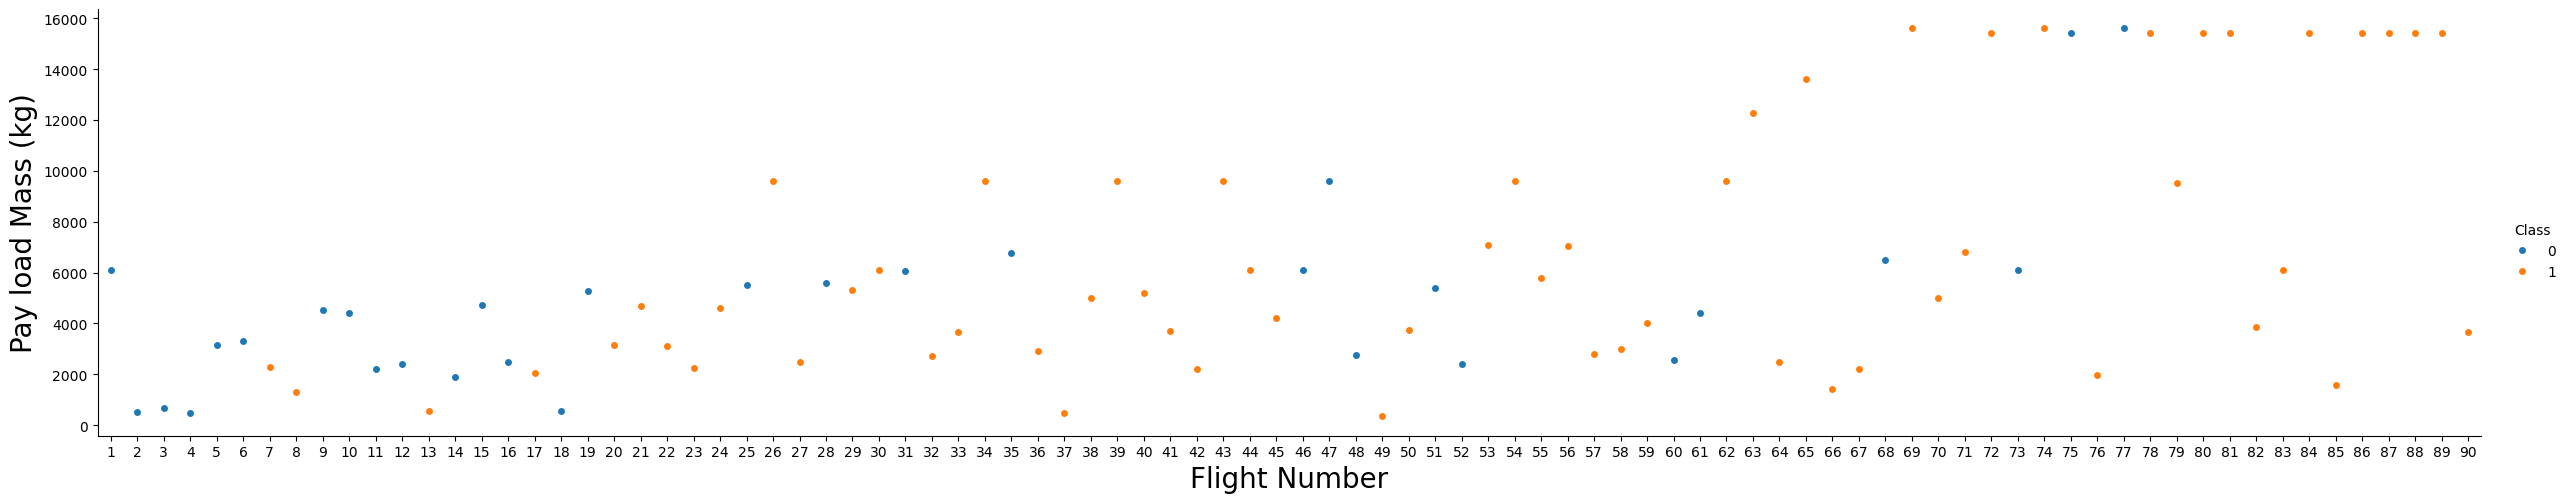

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

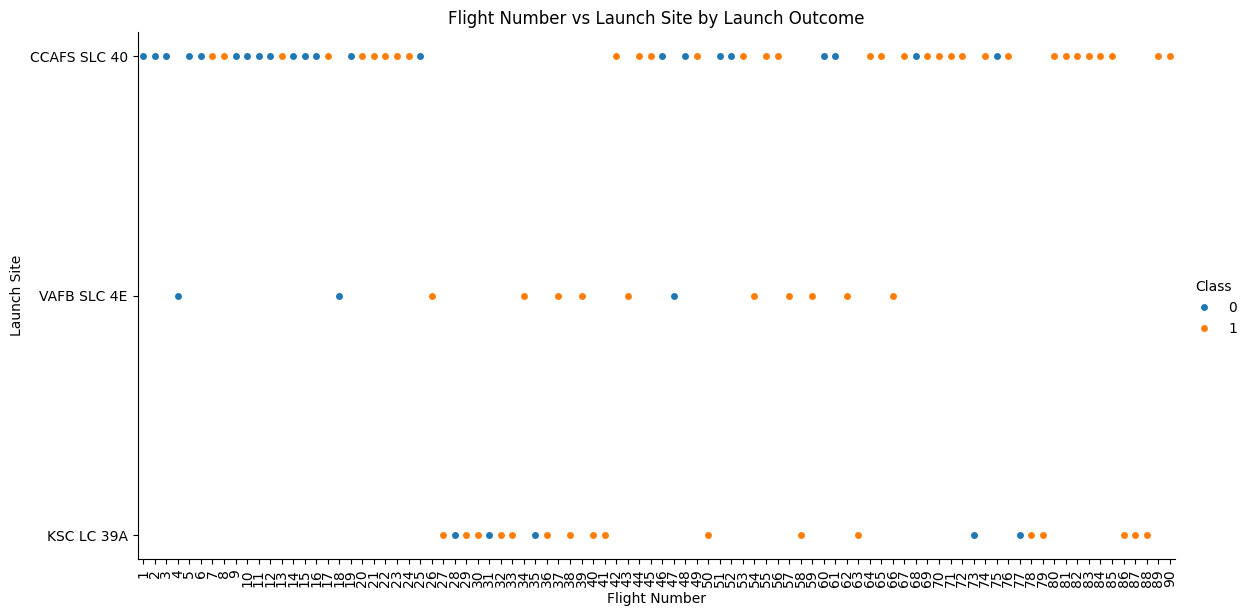

In [6]:
# Ensure FlightNumber is treated as categorical for proper x-axis display
df['FlightNumber'] = df['FlightNumber'].astype(str)

# Create a scatter-like categorical plot
g = sns.catplot(
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",
    data=df,
    kind="strip",  # or 'swarm' for better spacing
    height=6,
    aspect=2
)

# Set labels and rotate x-axis for readability
g.set_axis_labels("Flight Number", "Launch Site")
plt.xticks(rotation=90)
plt.title("Flight Number vs Launch Site by Launch Outcome")
plt.show()

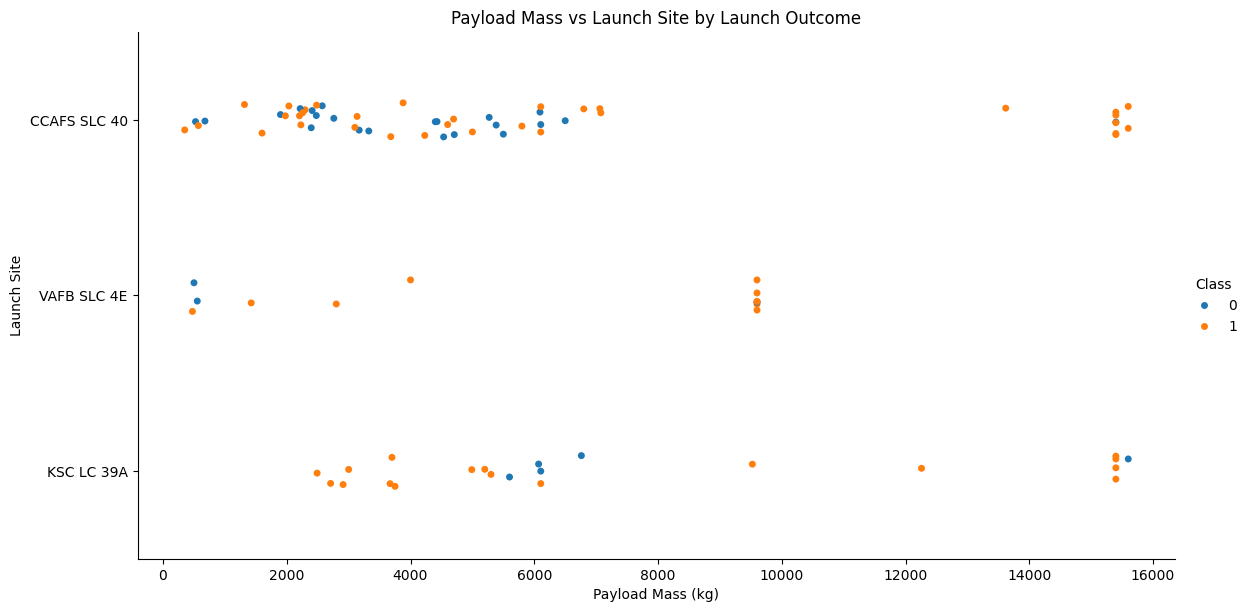

In [7]:
# Create a scatter-like categorical plot
g = sns.catplot(
    x="PayloadMass",
    y="LaunchSite",
    hue="Class",
    data=df,
    kind="strip",  # use 'swarm' to avoid overlapping points
    height=6,
    aspect=2
)

# Set axis labels and title
g.set_axis_labels("Payload Mass (kg)", "Launch Site")
plt.title("Payload Mass vs Launch Site by Launch Outcome")
plt.show()


<ipython-input-8-86ab05cf71f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Class', data=orbit_success, palette='viridis')


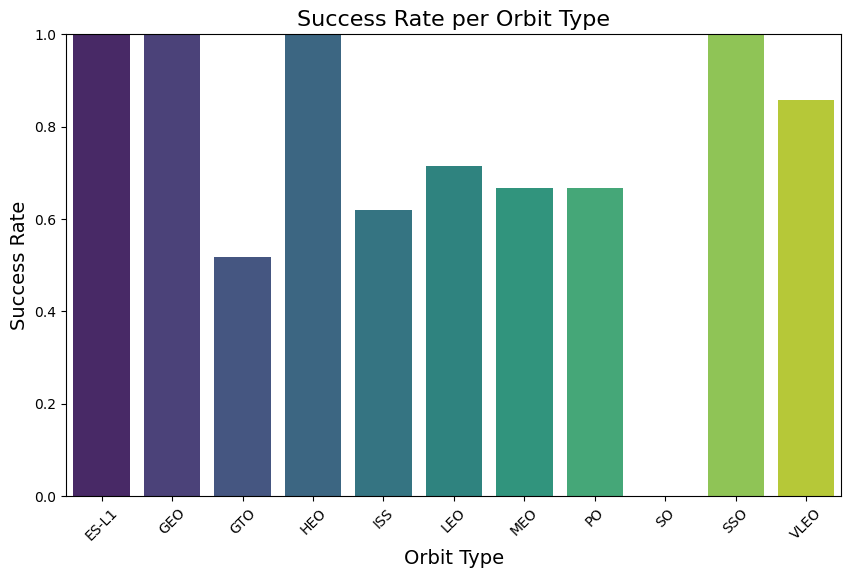

In [8]:
# Calculate success rate per orbit type
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()

# Plot a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Orbit', y='Class', data=orbit_success, palette='viridis')

# Set labels and title
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate per Orbit Type", fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0,1)  # since success rate is between 0 and 1
plt.show()


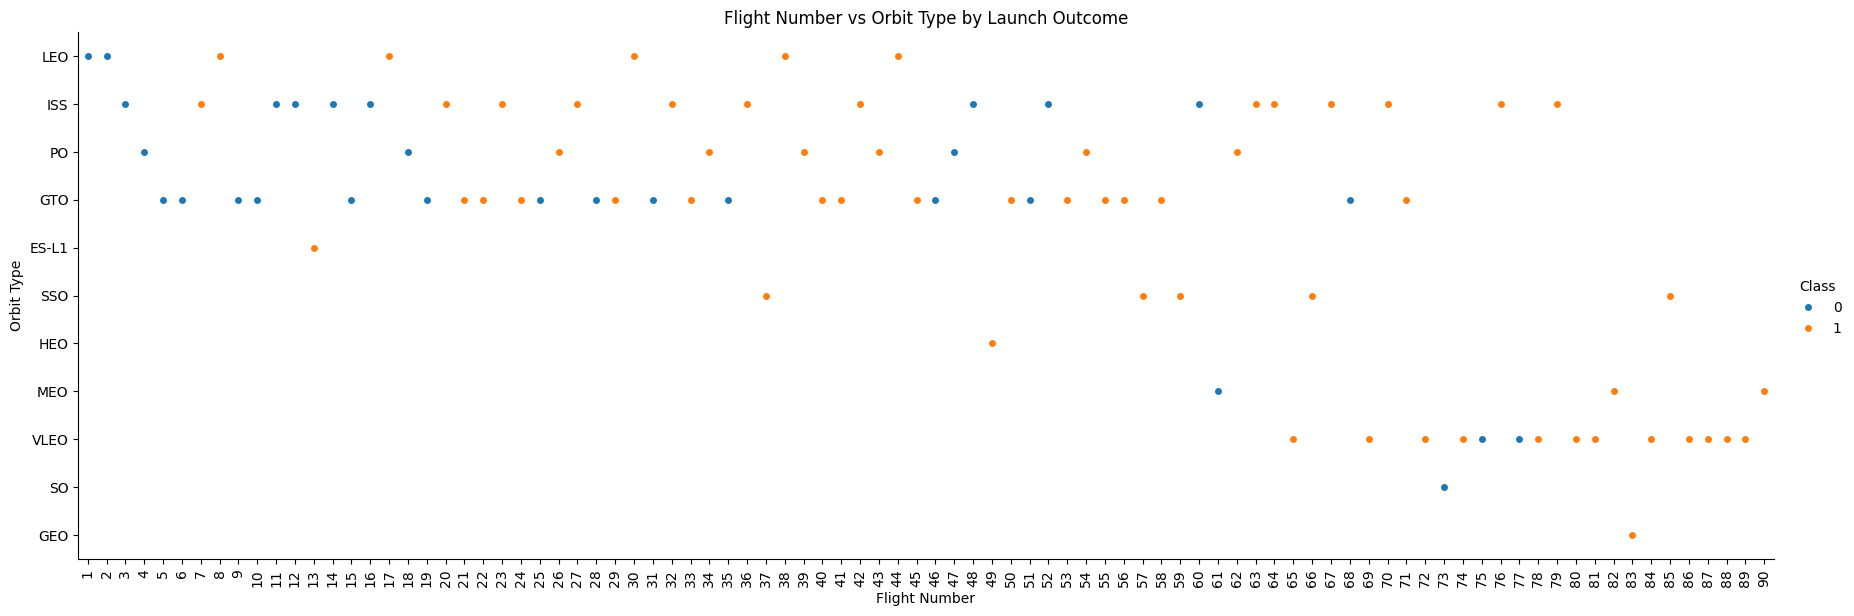

In [9]:
# Ensure FlightNumber is treated as categorical
df['FlightNumber'] = df['FlightNumber'].astype(str)

# Create a scatter-like categorical plot
g = sns.catplot(
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    data=df,
    kind="strip",  # use 'swarm' for better spacing
    height=6,
    aspect=3
)

# Set labels, rotate x-axis for readability
g.set_axis_labels("Flight Number", "Orbit Type")
plt.xticks(rotation=90)
plt.title("Flight Number vs Orbit Type by Launch Outcome")
plt.show()


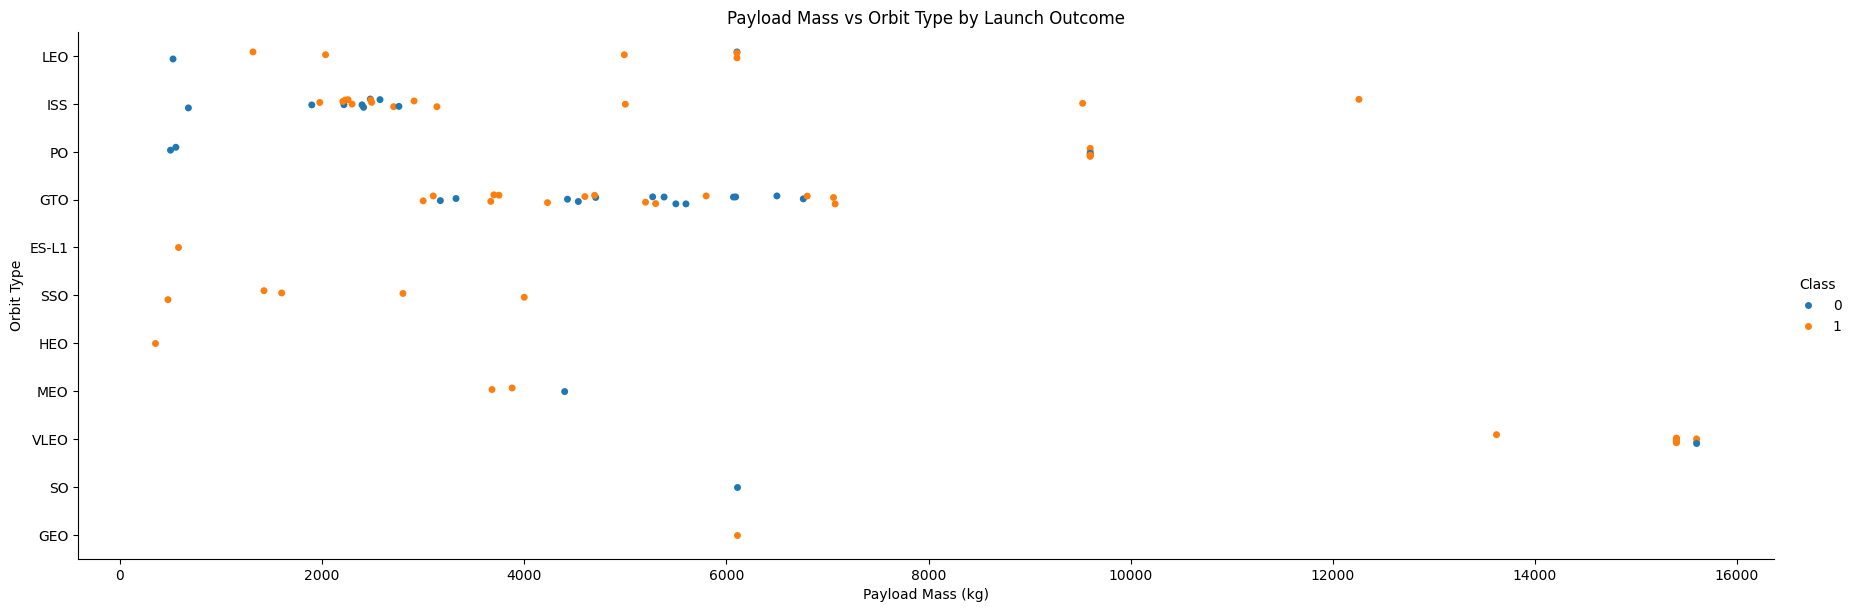

In [10]:
# Create a scatter-like categorical plot
g = sns.catplot(
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    data=df,
    kind="strip",  # 'swarm' is an alternative to avoid overlapping points
    height=6,
    aspect=3
)

# Set labels and title
g.set_axis_labels("Payload Mass (kg)", "Orbit Type")
plt.title("Payload Mass vs Orbit Type by Launch Outcome")
plt.show()

In [12]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


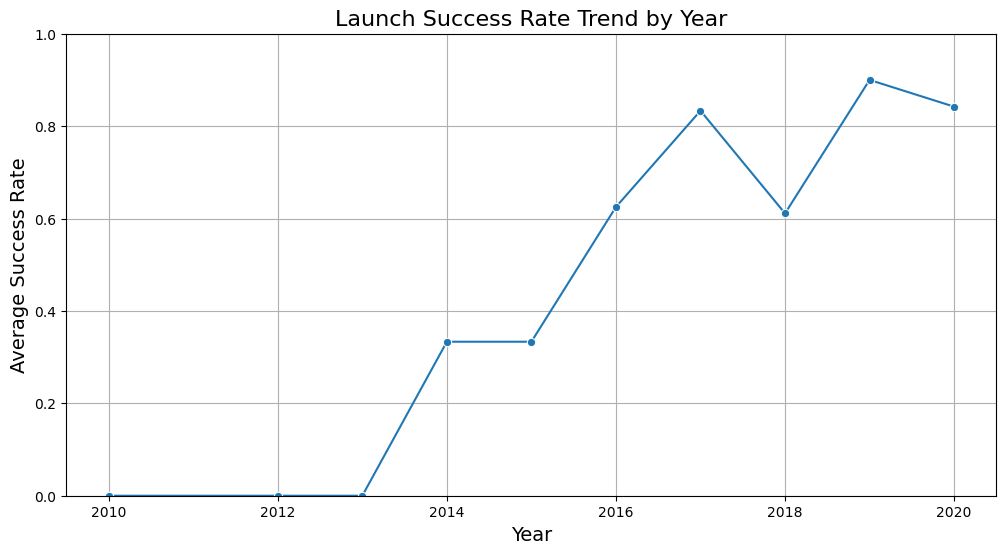

In [13]:
# Convert 'Date' column to numeric year just in case
df['Date'] = df['Date'].astype(int)

# Calculate average success rate per year
yearly_success = df.groupby('Date')['Class'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Class', data=yearly_success, marker='o')

# Set labels and title
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)
plt.title("Launch Success Rate Trend by Year", fontsize=16)
plt.ylim(0,1)  # Success rate between 0 and 1
plt.grid(True)
plt.show()


In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [15]:
# List of categorical columns to encode
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Apply One-Hot Encoding using get_dummies
features_one_hot = pd.get_dummies(features, columns=categorical_cols)

# Display the first few rows
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Cast all columns to float64
features_one_hot = features_one_hot.astype('float64')

# Display the first few rows to check
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
